<a href="https://colab.research.google.com/github/hnhyhj/Python-and-CCC/blob/master/31_Complete_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chpater 31
# Complete Search

Complete search is a general method that can be used to solve almost any
algorithm problem. The idea is to generate all possible solutions to the problem
using brute force, and then select the best solution or count the number of
solutions, depending on the problem.

Complete search is a good technique if there is enough time to go through
all the solutions, because the search is usually easy to implement and it always
gives the correct answer. If complete search is too slow, other techniques, such as
greedy algorithms or dynamic programming, may be needed.

## 31.1 Generating subsets

We first consider the problem of generating all subsets of a set of n elements. For
example, the subsets of {0,1,2} are ;, {0}, {1}, {2}, {0,1}, {0,2}, {1,2} and {0,1,2}.
There are two common methods to generate subsets: we can either perform a
recursive search or exploit the bit representation of integers.

### Method 1

An elegant way to go through all subsets of a set is to use recursion. The
following function search generates the subsets of the set {0,1,...,n ¡ 1}. The
function maintains a vector subset that will contain the elements of each subset.
The search begins when the function is called with parameter 0.


```
void search(int k) {
  if (k == n) {
    // process subset
  } else {
      search(k+1);
      subset.push_back(k);
      search(k+1);
      subset.pop_back();
  }
}
```

When the function search is called with parameter k, it decides whether to
include the element k in the subset or not, and in both cases, then calls itself
with parameter k-1 However, if k=n, the function notices that all elements
have been processed and a subset has been generated.

The following tree illustrates the function calls when n=3. We can always
choose either the left branch (k is not included in the subset) or the right branch
(k is included in the subset).


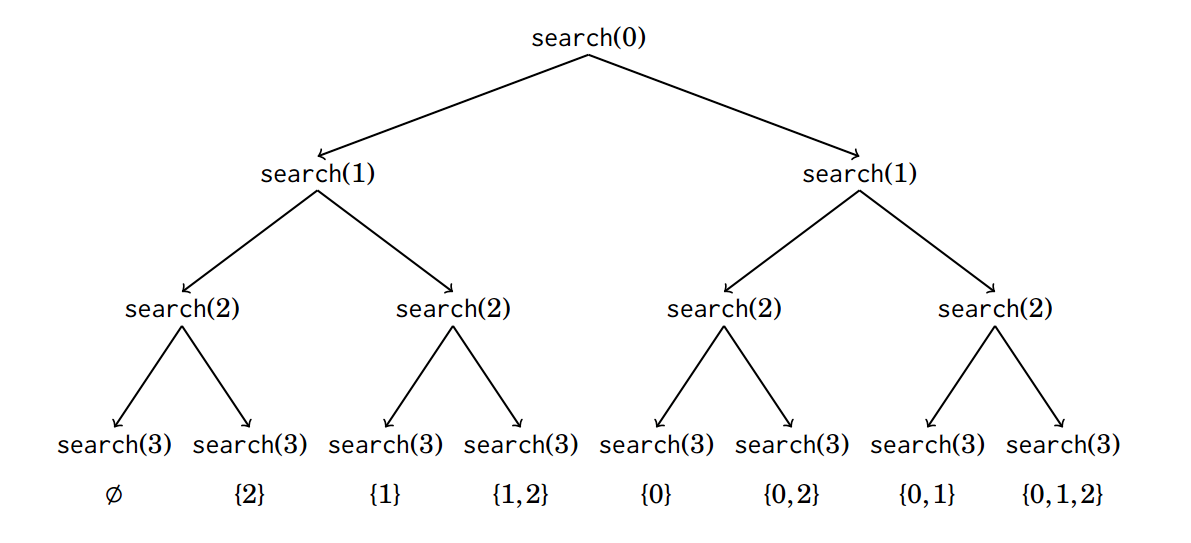

In [ ]:
"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subset_1(some_list):

    if len(some_list) == 0:
        return [[]]

    subsets = []
    first_element = some_list[0]
    remaining_list = some_list[1:]
   
    # Strategy: get all the subsets of remaining_list. For each
    # of those subsets, a full subset list will contain both
    # the original subset as well as a version of the subset
    # that contains first_element
    for part_of_subsets in find_all_subset_1(remaining_list):
        subsets.append(part_of_subsets)
        subsets.append([first_element] + part_of_subsets[:])

    return subsets

all_subsets = find_all_subset_1(a_list)

print(f"There are {len(all_subsets)} subsets in total:")
for item in all_subsets:
    print(item)

### Method 2

Another way to generate subsets is based on the bit representation of integers.
Each subset of a set of n elements can be represented as a sequence of n bits,
which corresponds to an integer between 0...$2^n-1$. The ones in the bit sequence
indicate which elements are included in the subset.

The usual convention is that the last bit corresponds to element 0, the second
last bit corresponds to element 1, and so on. For example, the bit representation
of 25 is 11001, which corresponds to the subset {0,3,4}.

The following code goes through the subsets of a set of n elements:


```
for (int b = 0; b < (1<<n); b++) {
    // process subset
}
```

The following code shows how we can find the elements of a subset that
corresponds to a bit sequence. When processing each subset, the code builds a
vector that contains the elements in the subset.



```
for (int b = 0; b < (1<<n); b++) {
    vector<int> subset;
    for (int i = 0; i < n; i++) {
        if (b&(1<<i)) subset.push_back(i);
    }
}
```




In [ ]:
#############################################################
#################       Version 1             ###############
#############################################################

"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subsets_2_1(some_list):
    length = len(some_list)
    for i in range(1 << length):
        print([some_list[j] for j in range(length) if (i & (1 << j))])

print(f"There are {1 << len(a_list)} subsets in total:")
find_all_subsets_2_1(a_list)

In [ ]:
#############################################################
#################       Version 2             ###############
#############################################################

"""
{4, 8, 9, 16, 25, 27, 32}
"""

"""Returns all subsets of size 0 - len(some_list) for some_list"""

a_list = [4, 8, 9, 16, 25, 27, 32]

def find_all_subsets_2_2(some_list):
    N = len(some_list)
    # enumerate the 2 ** N possible combinations
    for i in range(2 ** N):
        subsets = []
        for j in range(N):
            # test bit jth of integer i
            if (i >> j) % 2 == 1:
                subsets.append(some_list[j])
        yield subsets


all_subsets = list(find_all_subsets_2_2(a_list))

print(f"There are {len(all_subsets)} subsets in total:")
for item in all_subsets:
    print(item)

## 31.2 Generating permutations

Next we consider the problem of generating all permutations of a set of n elements.
For example, the permutations of {0,1,2} are (0,1,2), (0,2,1), (1,0,2), (1,2,0),
(2,0,1) and (2,1,0). Again, there are two approaches: we can either use recursion
or go through the permutations iteratively.

### 31.2.1 Method 1

Like subsets, permutations can be generated using recursion. The following
function search goes through the permutations of the set {0,1,...,n ¡ 1}. The
function builds a vector permutation that contains the permutation, and the
search begins when the function is called without parameters.


```
void search() {
  if (permutation.size() == n) {
    // process permutation
  } else {
    for (int i = 0; i < n; i++) {
      if (chosen[i]) continue;
      chosen[i] = true;
      permutation.push_back(i);
      search();
      chosen[i] = false;
      permutation.pop_back();
    }
  }
}
```

Each function call adds a new element to permutation. The array chosen
indicates which elements are already included in the permutation. If the size of
permutation equals the size of the set, a permutation has been generated.

### Method 2

Another method for generating permutations is to begin with the permutation
{0,1,...,n ¡ 1} and repeatedly use a function that constructs the next permutation in increasing order. The C++ standard library contains the function
next_permutation that can be used for this:



```
vector<int> permutation;
for (int i = 0; i < n; i++) {
    permutation.push_back(i);
}
do {
// process permutation
} while (next_permutation(permutation.begin(),permutation.end()));
```



In [1]:
num = float("inf")

In [2]:
1000000000000000 > num

False